In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, BisectingKMeans, SpectralClustering
import matplotlib.pyplot as plt

In [2]:
# 이미지 리 사이징 하기

dataset_dir = "./dataset/"
folders = os.listdir(dataset_dir)
folders = [f for f in folders if not f.endswith('.zip')]
total_img_np = []

for d in folders:
    target_dir = dataset_dir + d
    
    format = [".jpg", ".png", ".jpeg", "bmp", ".JPG", ".PNG", "JPEG", "BMP"]  # 지원하는 파일 형태의 확장자들
    for (path, dirs, files) in os.walk(target_dir):
        for file in files:
            if file.endswith(tuple(format)):
                image = Image.open(path + "/" + file)

                if image.mode != 'RGB':
                    image = image.convert('RGB')

                image = image.resize((100,100))
                if os.path.exists(f"./converted_dataset/{d}/") == False:
                    os.makedirs(f"./converted_dataset/{d}/")

                image.save(f"./converted_dataset/{d}/{file}")

            else:
                print(path)
                print("InValid", file)

    # 변환할 이미지 목록 불러오기
    image_path = f"./converted_dataset/{d}/"

    img_list = os.listdir(image_path)  # 디렉토리 내 모든 파일 불러오기

    img_list_np = []
    for i in img_list:
        img = Image.open(image_path + i)
        img_array = np.array(img)
        img_list_np.append(img_array)
        total_img_np.append(img_array)
        # print(i, " 추가 완료 - 구조:", img_array.shape)  # 불러온 이미지의 차원 확인 (세로X가로X색)
        # print(img_array.T.shape) #축변경 (색X가로X세로)

    img_np = np.array(img_list_np)  # 리스트를 numpy로 변환

    if os.path.exists(f"./np_converted_dataset/") == False:
        os.makedirs(f"./np_converted_dataset/")

    np.save(f'./np_converted_dataset/{d}', img_np)  
    print(img_np.shape) # (파일수 * 가로 * 세로 * RGB)
    print("결과: 정상적 으로 저장 완료")

np.save(f'./np_converted_dataset/total_img_np', total_img_np)

(382, 100, 100, 3)
결과: 정상적 으로 저장 완료
(364, 100, 100, 3)
결과: 정상적 으로 저장 완료


KeyboardInterrupt: 

In [14]:
import matplotlib.pyplot as plt

def draw_sample_data(arr, ratio=1):    
    if len(arr) > 100:
        arr = arr[:100]

    n = len(arr) # n은 샘플 개수입니다
    rows = int(np.ceil(n / 10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:  # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# 실사 그림이 많은 3,12,24,41,50 학습시키기
np_converted_dir = './np_converted_dataset/'
many_real_dir = ['L2_3.npy', 'L2_12.npy', 'L2_24.npy','L2_41.npy','L2_50.npy']

np_converted_dir_list = [fo for fo in os.listdir(np_converted_dir) if fo in many_real_dir]

arr0 = np.load(np_converted_dir+np_converted_dir_list[0])
for file_ in np_converted_dir_list[1:]:
    arr1 = np.load(np_converted_dir+file_)
    arr0 = np.concatenate((arr0, arr1))

arr0_2d = arr0.reshape(-1, 100 * 100 * 3)

clustering = KMeans(n_clusters=2, random_state = 2022) 
pca = PCA().fit(arr0_2d)
clustering.fit(pca.transform(arr0_2d))


print(f'총 이미지 수: {len(arr0)}') 
print(f'일러스트 이미지 수: {len(arr0[clustering.labels_ == 0])}')
print(f'실사 이미지 수: {len(arr0[clustering.labels_ == 1])}')
 

총 이미지 수: 3369
일러스트 이미지 수: 1909
실사 이미지 수: 1460


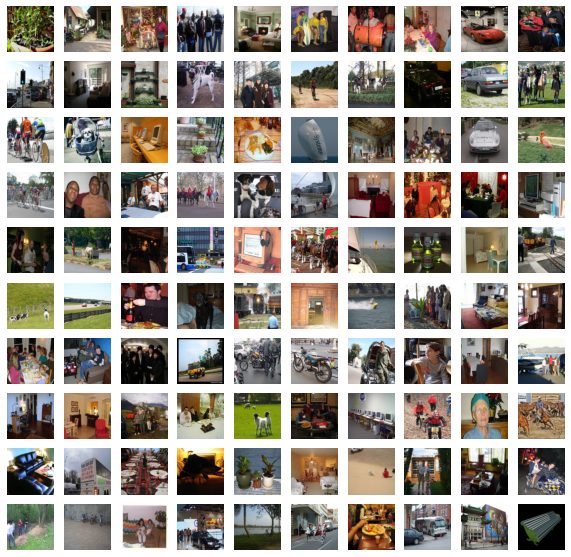

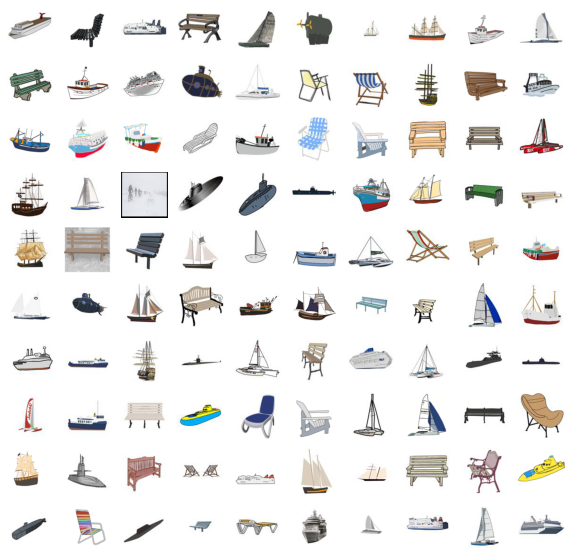

In [16]:
draw_sample_data(arr0[clustering.labels_ == 0])
draw_sample_data(arr0[clustering.labels_ == 1])   

In [17]:
# 앞서 미리 학습한 모델 가지고 predict

np_converted_dir = './np_converted_dataset/'
# many_real_dir = ['L2_3.npy', 'L2_12.npy', 'L2_24.npy','L2_41.npy','L2_50.npy']

np_converted_dir_list = [fo for fo in os.listdir(np_converted_dir) if fo.endswith('.npy')]

for i, file_ in enumerate(np_converted_dir_list):
    arr2 = np.load(np_converted_dir+file_)
    arr2_2d = arr2.reshape(-1, 100 * 100 * 3)
    
    new_clustering = clustering.predict(pca.transform(arr2_2d))
    
    label = file_.split('.')[0]
    print(f'{i}번째 Label: {label}')
    print(f'총 이미지 수: {len(arr2)}')
    print(f'일러스트 이미지 수: {len(arr2[new_clustering == 1])}')
    print(f'실사 이미지 수: {len(arr2[new_clustering == 0])}')
    
    # draw_sample_data(arr2[new_clustering == 0])
    print()
    # draw_sample_data(arr2[new_clustering == 1])    
    print()

    for i, img in enumerate(arr2[new_clustering == 1]):
        if os.path.exists(f"./selected_dataset/{label}") == False:
            os.makedirs(f"./selected_dataset/{label}")
            
        img = Image.fromarray(img, 'RGB')
        img.save(f'./selected_dataset/{label}/{i}.png')


0번째 Label: L2_3
총 이미지 수: 695
일러스트 이미지 수: 302
실사 이미지 수: 393


1번째 Label: L2_39
총 이미지 수: 454
일러스트 이미지 수: 446
실사 이미지 수: 8


2번째 Label: L2_10
총 이미지 수: 1893
일러스트 이미지 수: 1800
실사 이미지 수: 93


3번째 Label: L2_12
총 이미지 수: 518
일러스트 이미지 수: 125
실사 이미지 수: 393


4번째 Label: L2_15
총 이미지 수: 1509
일러스트 이미지 수: 1379
실사 이미지 수: 130


5번째 Label: L2_24
총 이미지 수: 782
일러스트 이미지 수: 422
실사 이미지 수: 360


6번째 Label: L2_30
총 이미지 수: 364
일러스트 이미지 수: 363
실사 이미지 수: 1


7번째 Label: L2_25
총 이미지 수: 6189
일러스트 이미지 수: 6124
실사 이미지 수: 65


8번째 Label: L2_33
총 이미지 수: 6206
일러스트 이미지 수: 6181
실사 이미지 수: 25


9번째 Label: L2_27
총 이미지 수: 426
일러스트 이미지 수: 421
실사 이미지 수: 5


10번째 Label: L2_21
총 이미지 수: 410
일러스트 이미지 수: 407
실사 이미지 수: 3


11번째 Label: L2_34
총 이미지 수: 419
일러스트 이미지 수: 418
실사 이미지 수: 1


12번째 Label: L2_20
총 이미지 수: 410
일러스트 이미지 수: 398
실사 이미지 수: 12


13번째 Label: L2_52
총 이미지 수: 382
일러스트 이미지 수: 380
실사 이미지 수: 2


14번째 Label: L2_46
총 이미지 수: 2214
일러스트 이미지 수: 2207
실사 이미지 수: 7


15번째 Label: L2_50
총 이미지 수: 781
일러스트 이미지 수: 405
실사 이미지 수: 376


16번째 Label: